**Fake Vs real Job Posting Detection**
Data Pre processing and Exploratory Data Analysis(EDA)

Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import missingno as ms

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Getting the Data

In [3]:
# Uploading fake_job_postings data file 
from google.colab import files
import io
uploaded = files.upload()
fake_real_data = pd.read_csv(io.BytesIO(uploaded['fake_job_postings.csv']), encoding='utf-8')

Saving fake_job_postings.csv to fake_job_postings (1).csv


In [5]:
# Displaying data values
fake_real_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
# DataFrame Information
fake_real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# Statistical Description of the dataset
fake_real_data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Frequency of data in fraudulent column
fake_real_data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

Missing Values

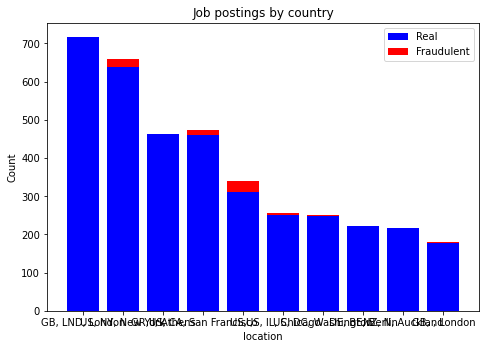

In [9]:
# Visualisation of the missing value in the entire dataset
# Blue for Real Jobs
# Red for Fraudulent data
ccount = fake_real_data.groupby(['location', 'fraudulent']).size().unstack('fraudulent', fill_value=0)
ccount = ccount.sort_values(by=[0, 1], ascending=False)
ccount_10 = ccount[:10] # Taking top 10 countries
fig = plt.figure()
axi = fig.add_axes([0, 0, 1, 1])
axi.bar(ccount_10.index, ccount_10[0], color = 'b')
axi.bar(ccount_10.index, ccount_10[1], bottom = ccount_10[0], color = 'r')
axi.set_ylabel('Count')
axi.set_xlabel('location')
axi.set_title('Job postings by country')
axi.legend(labels=['Real', 'Fraudulent'])

In [0]:
# Missing value count
# Importing keras libiraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_length = 100
vocab_size = 1500
embedding_dim = 32
sentence = {}
sentence['descriptions'] = fake_real_data['description'].replace(np.nan, '', regex=True).to_numpy()
sentence['labels'] = fake_real_data['fraudulent'].to_numpy()
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '&lt;OOV>')
tokenizer.fit_on_texts(sentence['descriptions'])
sequences = tokenizer.texts_to_sequences(sentence['descriptions'])
padded_sequences = pad_sequences(sequences, maxlen = max_length, padding = 'post')

In [0]:
from fastai.text import *
from fastai import *
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Replacing Null values with 'No information'
fake_real_data.fillna(value='No information',inplace=True)

In [0]:
sns.set_style('darkgrid')

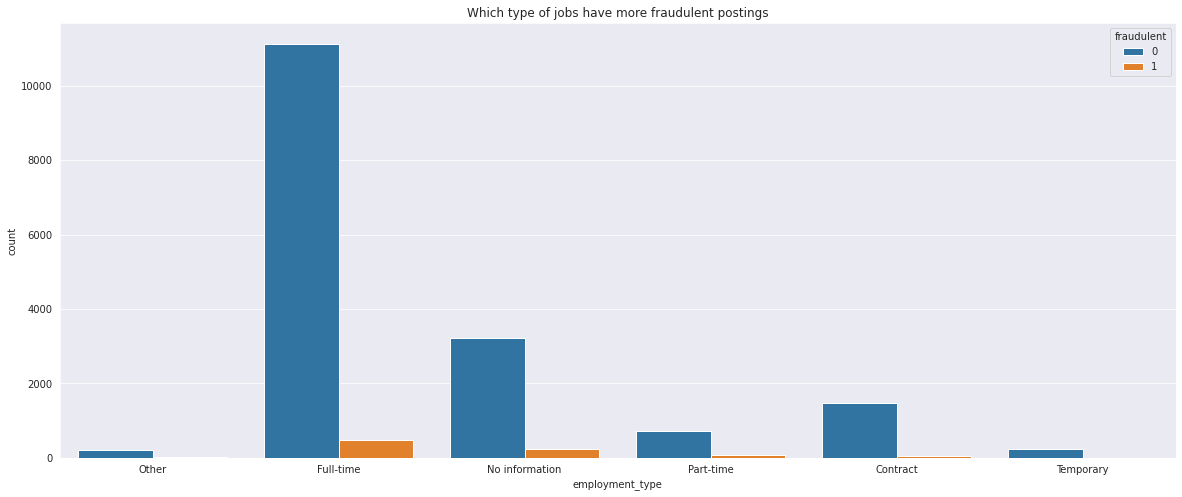

In [14]:
# Employment type vs count visualization
plt.figure(1,figsize=(20,8))
sns.countplot(hue=fake_real_data.fraudulent,x=fake_real_data.employment_type);
plt.title('Which type of jobs have more fraudulent postings');

(0.0, 800.0)

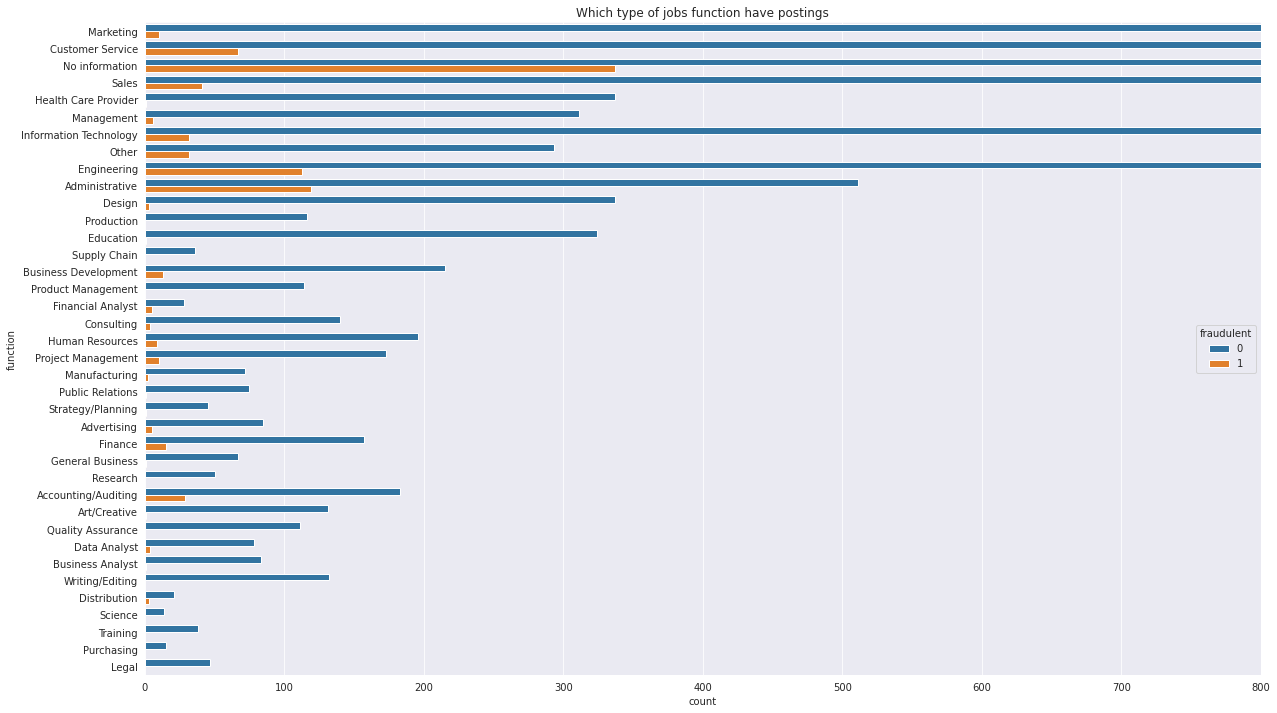

In [15]:
# Visualization of data for different types of job postings v/s Real or Fake jobs
plt.figure(1,figsize=(20,12))
sns.countplot(y=fake_real_data.function,hue=fake_real_data.fraudulent);
plt.title('Which type of jobs function have postings');
plt.xlim(0,800)

In [16]:
# Creating text list of few columns data
path = Path('/kaggle/working/')
data_lm = (TextList.from_df(fake_real_data,path,cols=['company_profile','description','requirements','benefits'])
           # Creating a textlist for lang model df--> dataframe , cols = Columns of df you want to include in language model
                  .split_by_rand_pct(0.2)
           # # will take 20% of text as validation set
                  .label_for_lm()
           # label it according to a language model
                  .databunch(bs=128))
          

In [17]:
data_lm.show_batch(rows=6)

idx,text
0,": / / 90 # url_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630 # 90 xxmaj seconds removes the hassle , cost , risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience . xxmaj with a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries , 90 xxmaj seconds provides"
1,"xxmaj perry , xxmaj calvin xxmaj klein , xxmaj coach , xxmaj ellery , xxmaj xxunk , xxmaj xxunk , xxmaj gilt , xxmaj max xxmaj mara , xxmaj shopbop , xxmaj sneakerboy and xxmaj topshop . xxmaj the xxup pr xxmaj account xxmaj manager will be highly motivated and proactive . xxmaj the ideal candidate will have a proven track record with relevant case studies , sound knowledge"
2,"fill and cost per hire . xxmaj will be primarily responsible for maintaining xxup ats software to track applicants through the selection phase through to on - boarding , evaluating and choosing candidate sourcing options ( i.e. linkedin , xxmaj indeed , xxmaj glassdoor , etc . ) , and reviewing and adapting the recruiting processes from xxmaj headcount analysis through employee onboarding . xxmaj identify and source first"
3,"acetates , serving the xxmaj food , xxmaj pharmaceutical and xxmaj technical industries . xxmaj with two longstanding and fully automated manufacturing sites , located in xxmaj niagara xxmaj falls , xxup ny xxup usa , and xxmaj tiel , xxmaj the xxmaj netherlands , xxmaj niacet offers world - class quality products to a global market . xxmaj our products fill vital needs in a broad range of applications"
4,"the call centre industry in xxmaj mauritius . xxmaj operating since 1999 , xxup xxunk xxup bpo xxmaj services offers a range of contact centre / call centre solutions as well as xxup bpo services from its offices in xxmaj mauritius . xxup about xxup this jobwe are looking for potential candidates to promote online xxmaj chat and xxmaj customer xxmaj support"
5,"the country ; we also publish well - known professionals like xxmaj mario xxmaj batali , xxmaj gwyneth xxmaj paltrow , and xxmaj danny xxmaj meyer . xxmaj and we have partnerships with xxmaj whole xxmaj foods xxmaj market and xxmaj random xxmaj house . xxmaj food52 has been named the best food website by the xxmaj james xxmaj beard xxmaj foundation and xxup iacp , and has been featured"


In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,metrics=[accuracy,Perplexity()],model_dir='/kaggle/working/',drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,perplexity,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


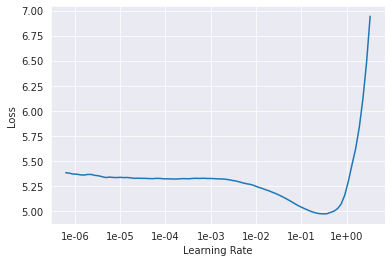

In [43]:
learn.lr_find()
learn.recorder.plot()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from tqdm import tqdm
import time
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn import preprocessing, model_selection, pipeline
from sklearn.metrics import f1_score, roc_auc_score

from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

In [0]:
df = fake_real_data

In [22]:
# Checking missing values
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [23]:
# Extracting text features

text_df = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')

text_df.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No information,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No information,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [24]:
# Catagorical Feature
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_df = cat_df.fillna("None")

cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,No information,No information,Marketing,0
1,0,1,0,Full-time,Not Applicable,No information,Marketing and Advertising,Customer Service,0
2,0,1,0,No information,No information,No information,No information,No information,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


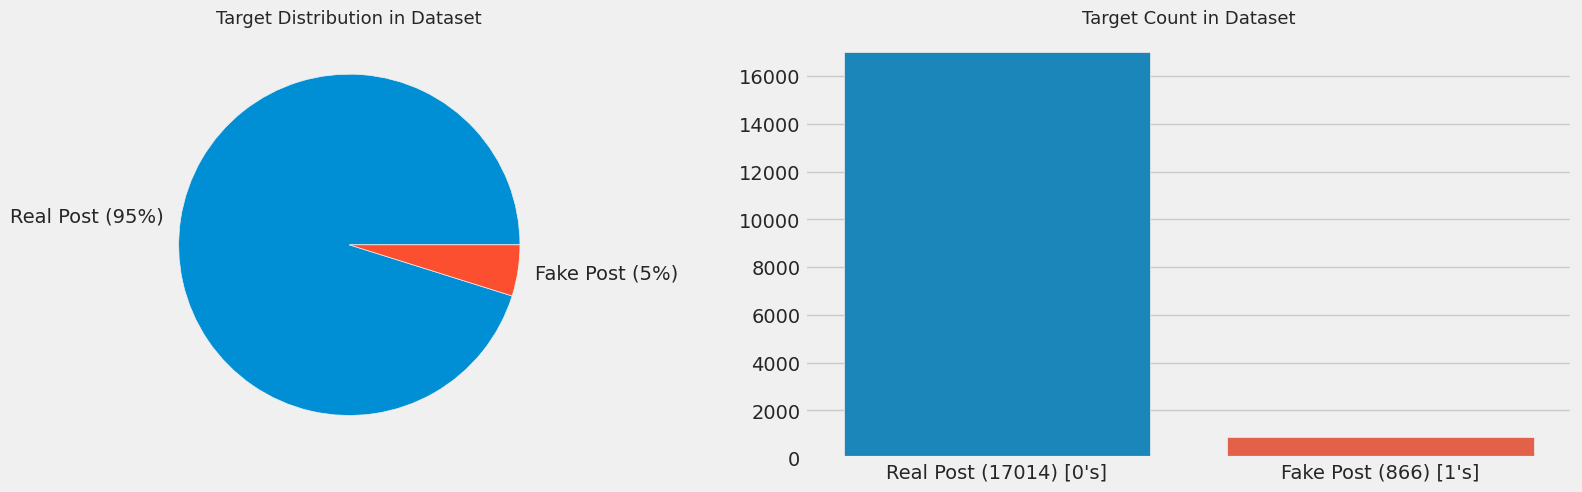

In [25]:
# Visualisation
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = df["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


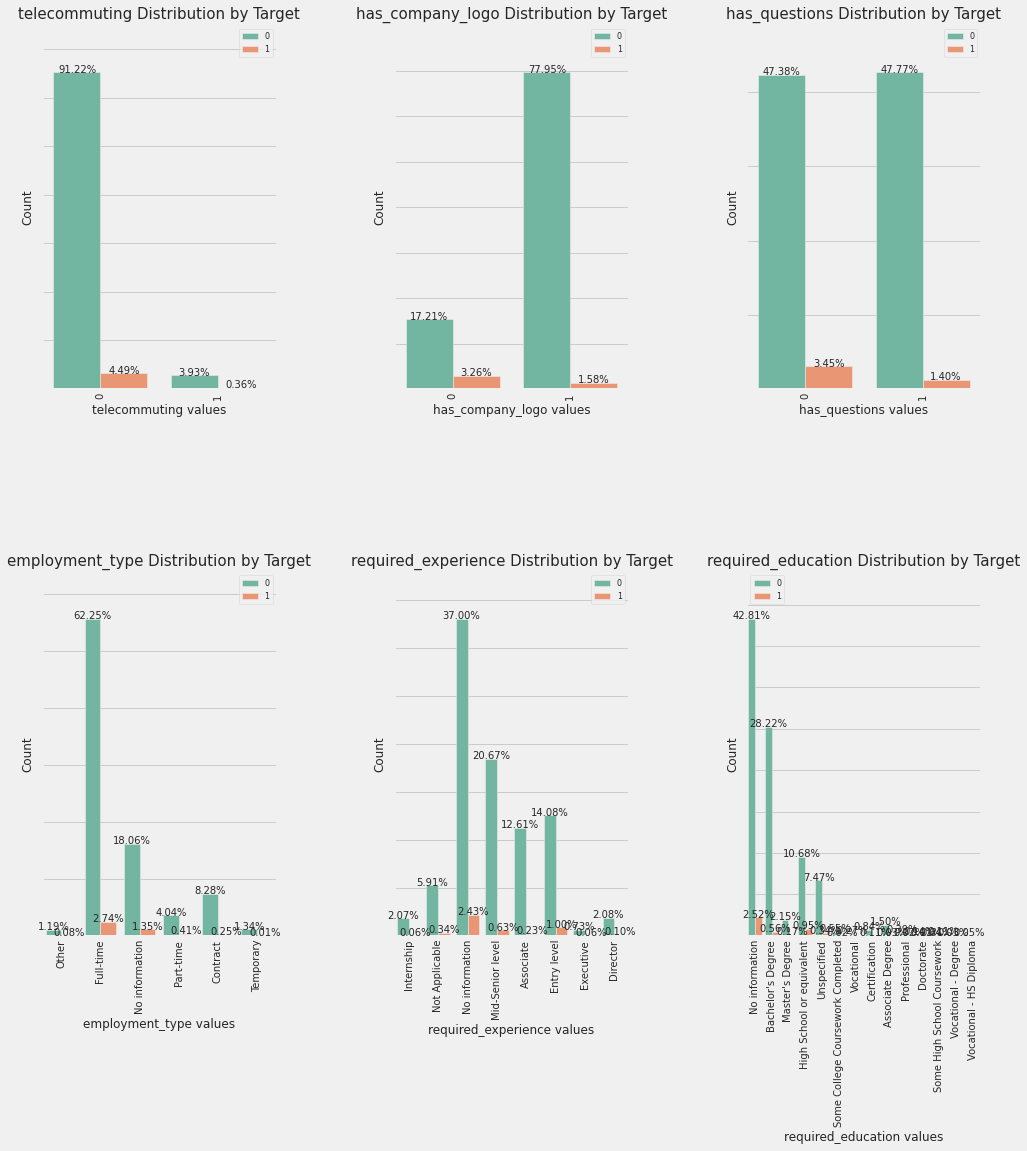

In [26]:
cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# Visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# Loop to get column and the count of plots
for n, col in enumerate(cat_df[cat_cols]): 
    ax = plt.subplot(grid[n]) # Feeding the figure of grid
    sns.countplot(x=col, data=cat_df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(cat_df)
    sizes=[] # Get highest values in y
    for p in ax.patches: # Loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #Set y limit based on highest heights


plt.show()

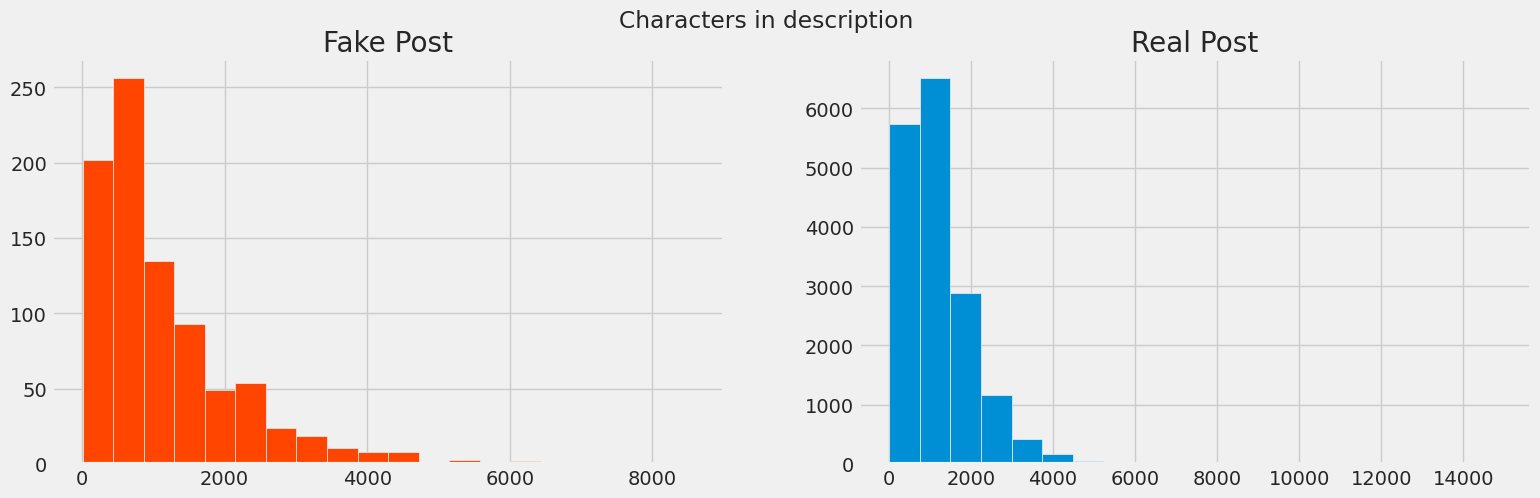

In [27]:
# Visualizing Posts with Characters in description column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['description'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['description'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

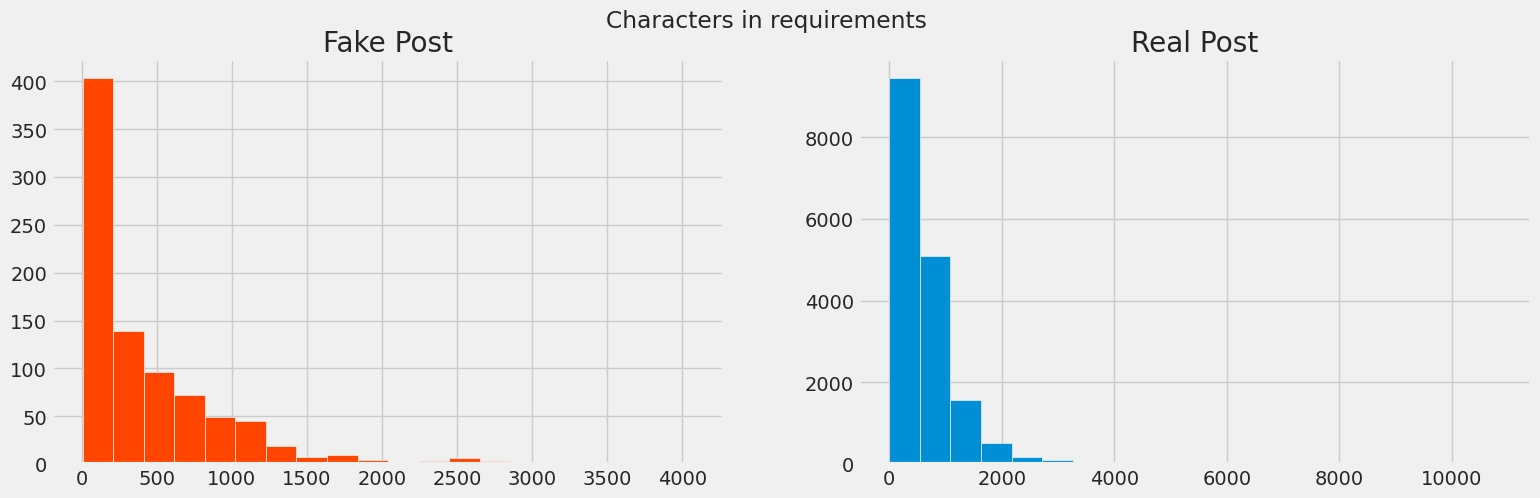

In [28]:
# Visualizing Posts with Characters in requirements column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length,bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in requirements')
plt.show()

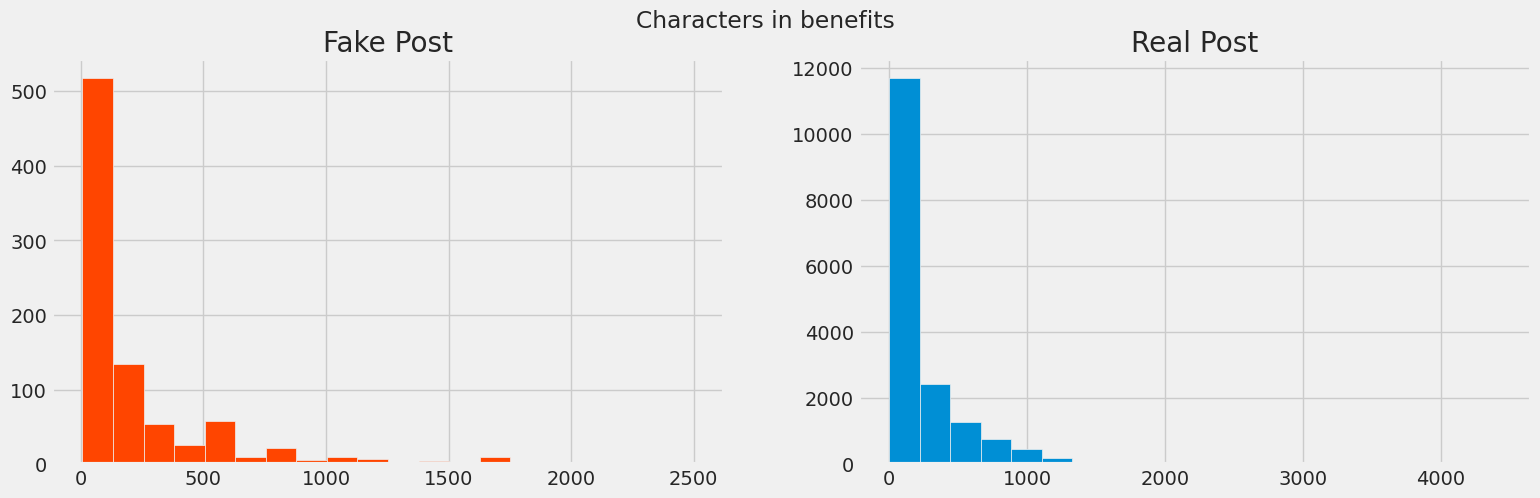

In [29]:
# Visualizing Posts with Characters in benifits column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['benefits'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['benefits'].str.len()
ax2.hist(length,bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in benefits')
plt.show()

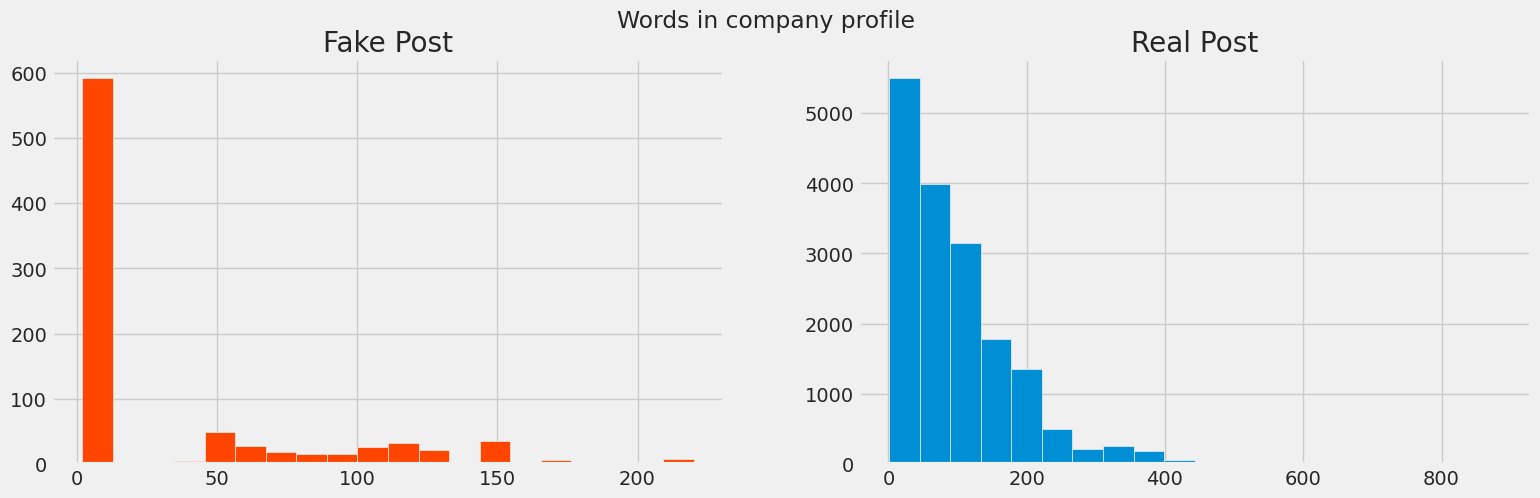

In [30]:
# Visualizing Posts with Characters in company profile column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

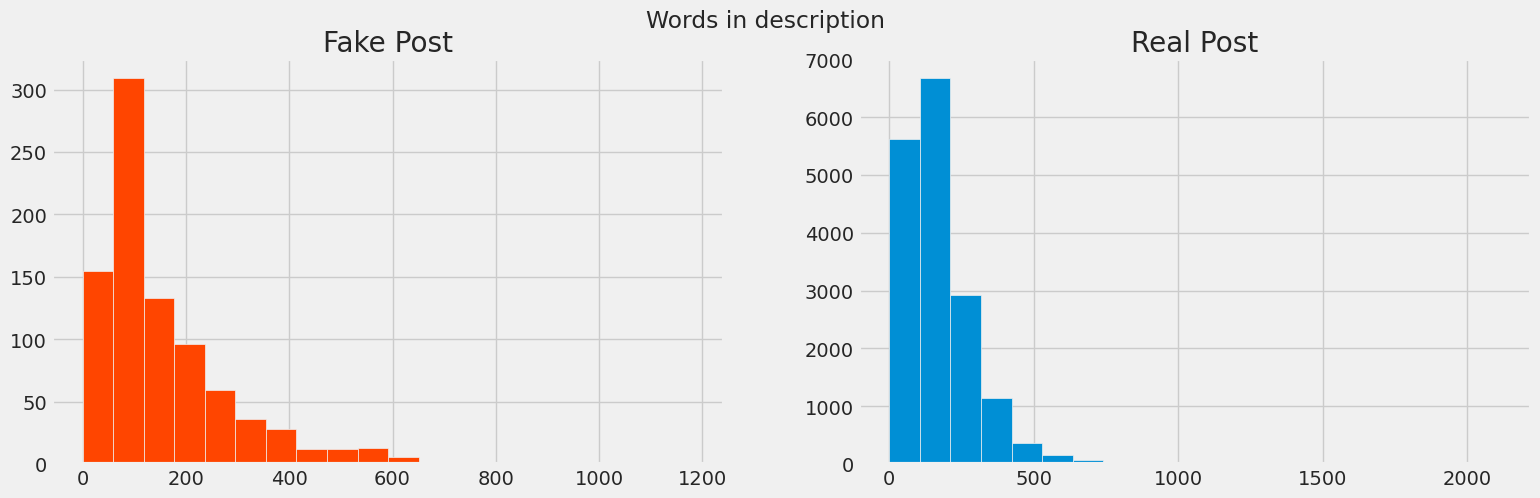

In [31]:
# Visualizing Posts with Characters in job description column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in description')
plt.show()

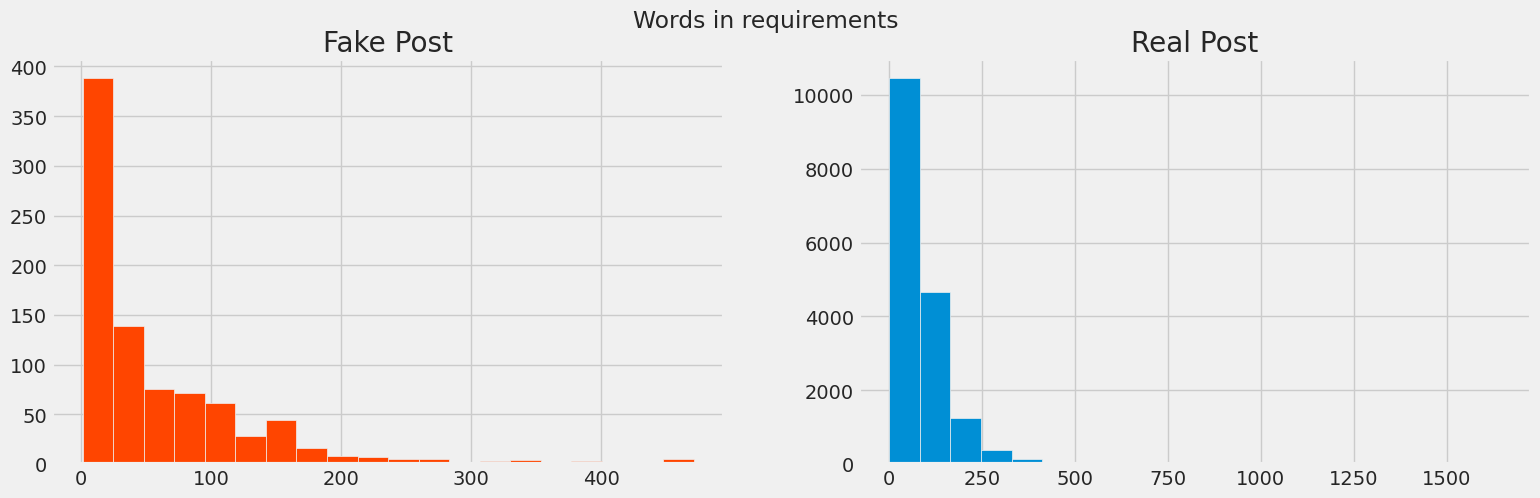

In [32]:
# Visualizing Posts with Characters in job requirements column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['requirements'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['requirements'].str.split().map(lambda x: len(x))
ax2.hist(num,bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in requirements')
plt.show()

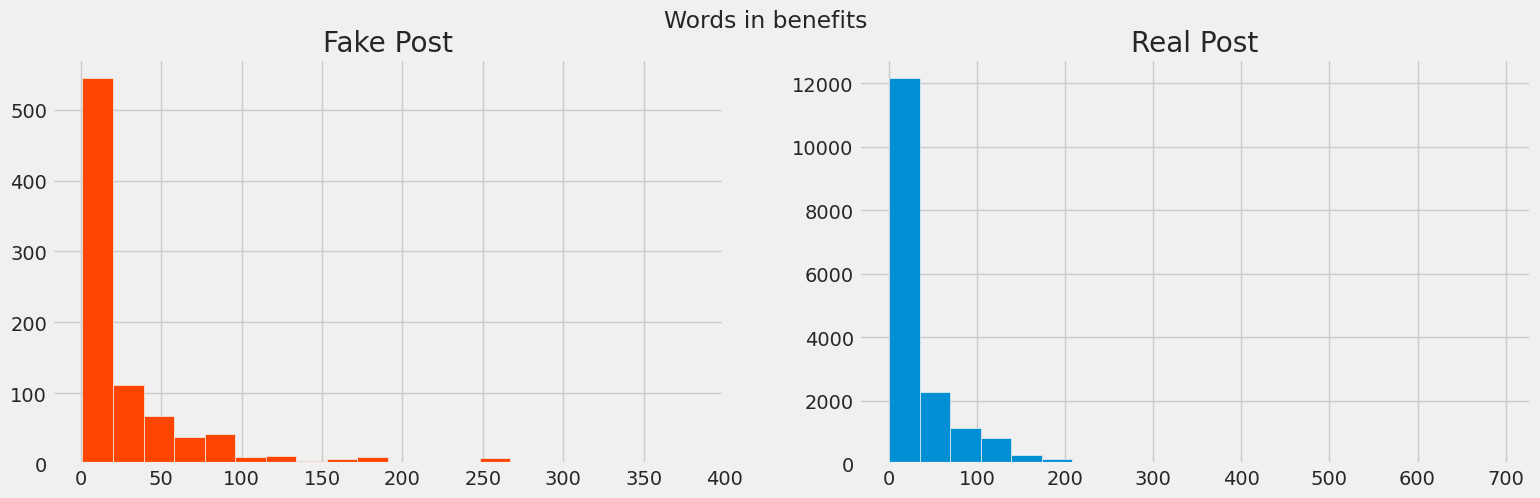

In [33]:
# Visualizing Posts with Characters in employee benefits column
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['benefits'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['benefits'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in benefits')
plt.show()

In [34]:
# Concate the text data for preprocessing and modeling
text = text_df[text_df.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
target = df['fraudulent']

print(len(text))
print(len(target))

17880
17880


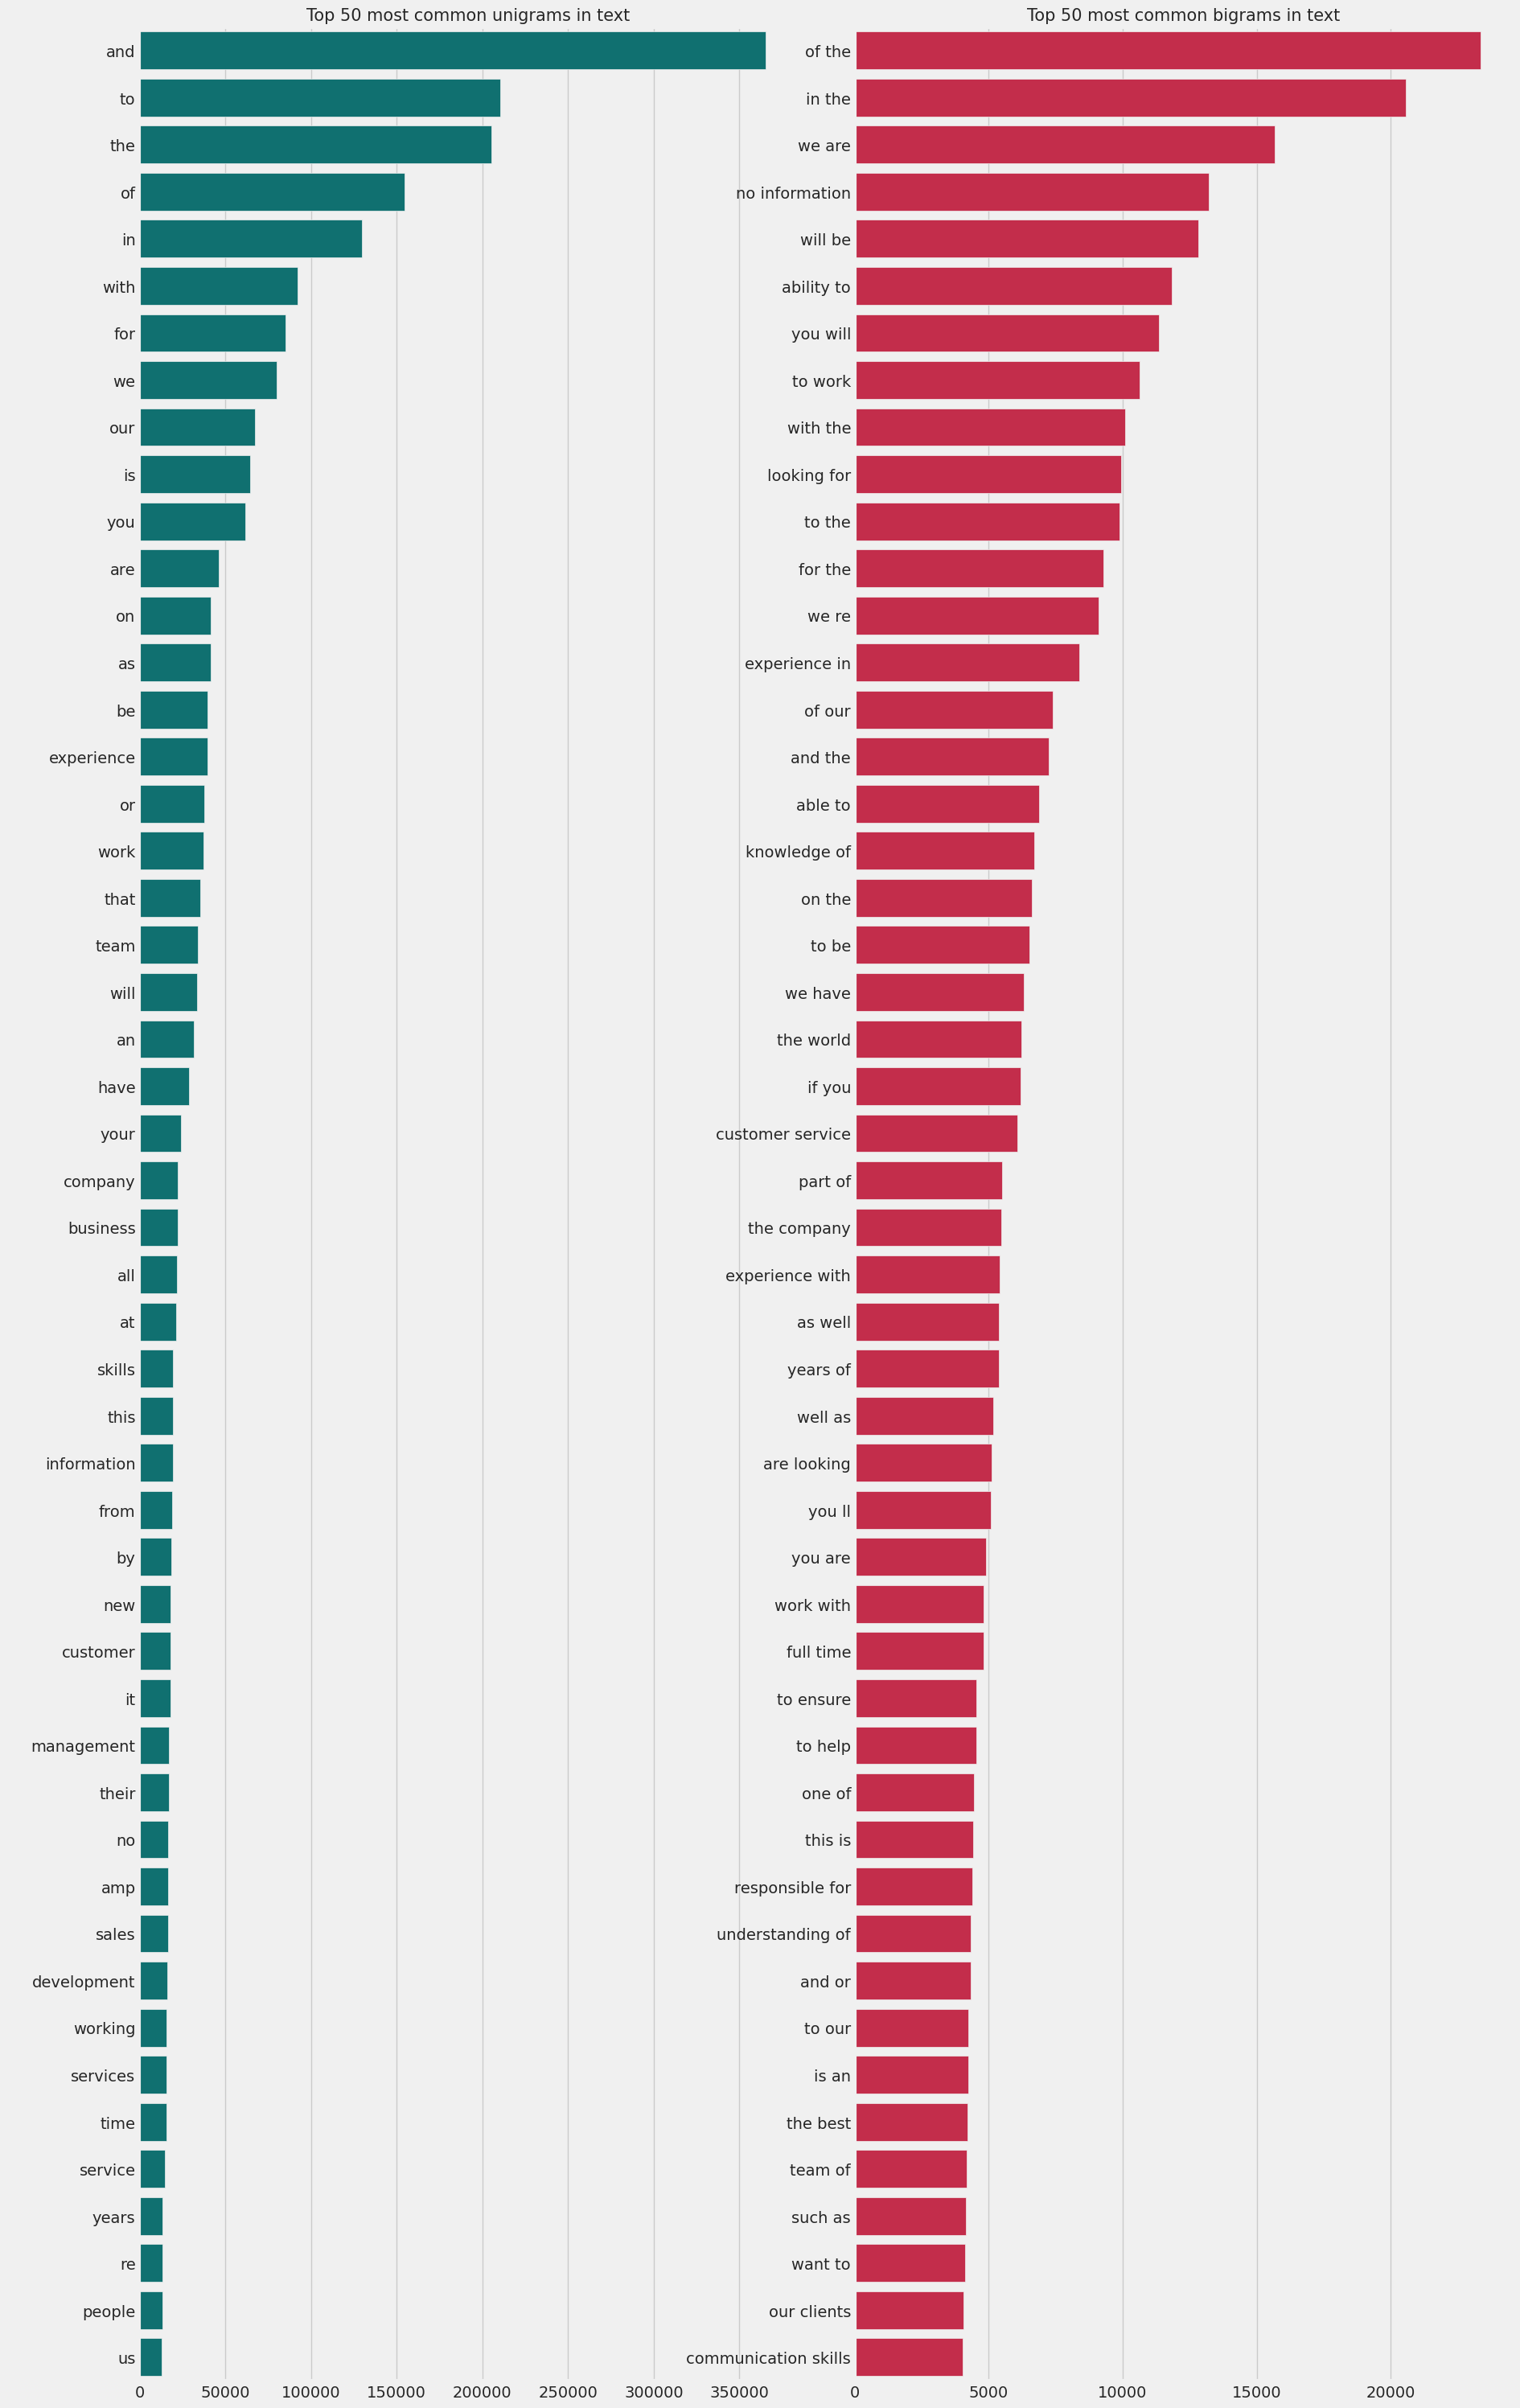

In [35]:
# Creating unigram model
def get_top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Creating bigram model
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Marking plots
fig, axes = plt.subplots(ncols=2, figsize=(18, 30), dpi=100)
plt.tight_layout()

top_unigrams=get_top_tweet_unigrams(text)[:50]
x,y=map(list,zip(*top_unigrams))
sns.barplot(x=y,y=x, ax=axes[0], color='teal')


top_bigrams=get_top_tweet_bigrams(text)[:50]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x, ax=axes[1], color='crimson')


axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')

axes[0].set_title('Top 50 most common unigrams in text', fontsize=15)
axes[1].set_title('Top 50 most common bigrams in text', fontsize=15)

plt.show()

In [36]:
# Removing stop words to clean the data
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    texts = [tex.lower() for tex in text]
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
text = text.apply(lambda x: clean_text(x))
text.head(3)

<class 'pandas.core.series.Series'>


0    Marketing InternWere  and weve created a groun...
1    Customer Service  Cloud Video  Seconds the wor...
2    Commissioning Machinery Assistant CMAValor Ser...
dtype: object

In [37]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Appling tokenizer5
text = text.apply(lambda x: tokenizer.tokenize(x))
text.head(3)

0    [Marketing, InternWere, and, weve, created, a,...
1    [Customer, Service, Cloud, Video, Seconds, the...
2    [Commissioning, Machinery, Assistant, CMAValor...
dtype: object

In [38]:
import nltk
nltk.download("stopwords")
stop_words = stopwords.words('english')

def remove_stopwords(text):
    # Removing stopwords belonging to english language
    words = [w for w in text if w not in stop_words]
    return words


text = text.apply(lambda x : remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Combine the list of texts
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

text = text.apply(lambda x : combine_text(x))
text.head(3)

0    Marketing InternWere weve created groundbreaki...
1    Customer Service Cloud Video Seconds worlds Cl...
2    Commissioning Machinery Assistant CMAValor Ser...
dtype: object

In [114]:
# Training and testing data for count vectorizer model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
auc_buf = []   
cnt = 0
predictions = 0
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(text, target):
    print('Fold {}'.format(cnt + 1))
    train_X, test_X = text[train_ix], text[test_ix]
    train_y, test_y = target[train_ix], target[test_ix]
    # Appling Count Vectorizer
    count_vectorizer = CountVectorizer()
    train_X_vec = count_vectorizer.fit_transform(train_X)
    test_X_vec = count_vectorizer.transform(test_X)    
    
    lr = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000, verbose=0, n_jobs=-1)
    lr.fit(train_X_vec, train_y)
    preds = lr.predict(test_X_vec)
    
    auc = roc_auc_score(test_y, preds)
    print('{} AUC: {}'.format(cnt, auc))
    auc_buf.append(auc)
    cnt += 1

# printing accuracy for every fold
print('AUC mean score = {:.6f}'.format(np.mean(auc_buf)))
print('AUC std score = {:.6f}'.format(np.std(auc_buf)))


Fold 1
0 AUC: 0.8401588873469346
Fold 2
1 AUC: 0.8491232659384188
Fold 3
2 AUC: 0.8225239885242366
Fold 4
3 AUC: 0.8722446532216558
Fold 5
4 AUC: 0.8605992418252953
AUC mean score = 0.848930
AUC std score = 0.017053


In [44]:
# installing tensorflow dependency for NLP ULMFit 
!pip install bert-tensorflow

In [0]:
import pandas as pd 
import numpy as np 
import torch.nn as nn
# from pytorch_pretrained_bert import BertTokenizer, BertModel
import torch
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

In [46]:
df = df[['description', 'fraudulent']]
print(df.head())

                                         description  fraudulent
0  Food52, a fast-growing, James Beard Award-winn...           0
1  Organised - Focused - Vibrant - Awesome!Do you...           0
2  Our client, located in Houston, is actively se...           0
3  THE COMPANY: ESRI – Environmental Systems Rese...           0
4  JOB TITLE: Itemization Review ManagerLOCATION:...           0


In [47]:
from collections import Counter
print(Counter(df['fraudulent'].values))

Counter({0: 17014, 1: 866})


In [0]:
df.dropna(inplace = True)

In [0]:
df_fraudulent= df[df['fraudulent'] == 1] 
df_normal = df[df['fraudulent'] == 0] 
df_normal = df_normal.sample(n=len(df_fraudulent))
df = df_normal.append(df_fraudulent)
df = df.sample(frac=1, random_state = 24).reset_index(drop=True)

In [50]:
print(Counter(df['fraudulent'].values))

Counter({0: 866, 1: 866})


In [0]:
# Dividing training and testing data
train_data = df.head(866)
test_data = df.tail(866)


In [0]:
train_data = [{'description': description, 'fraudulent': fraudulent } for description in list(train_data['description']) for fraudulent in list(train_data['fraudulent'])]
test_data = [{'description': description, 'fraudulent': fraudulent } for description in list(test_data['description']) for fraudulent in list(test_data['fraudulent'])]

In [0]:
train_texts, train_labels = list(zip(*map(lambda d: (d['description'], d['fraudulent']), train_data)))
test_texts, test_labels = list(zip(*map(lambda d: (d['description'], d['fraudulent']), test_data)))

In [1]:
# Inprogress
!pip install pytorch_pretrained_bert
import pandas as pd 
import numpy as np 
import torch.nn as nn
from pytorch_pretrained_bert import BertTokenizer, BertModel
import torch
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
# from bert import bert_tokenization
# BertTokenizer = bert_tokenization.FullTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)  #from_pretrained('bert-base-uncased', do_lower_case=True)
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:511], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:511], test_texts))
train_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))
test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))
train_tokens_ids = pad_sequences(train_tokens_ids, maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(test_tokens_ids, maxlen=512, truncating="post", padding="post", dtype="int")


Using TensorFlow backend.


NameError: ignored